In [1]:

#import dependencies
from bs4 import BeautifulSoup as bs
from splinter import Browser
import os
import pandas as pd
import time
from urllib.parse import urlsplit

In [2]:
import pymongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [3]:
#chrome browser for pagination 
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser = Browser('chrome', **executable_path, headless=False)


In [4]:

#hit the mars.nasa.gov page
url_news = "https://mars.nasa.gov/news/"
browser.visit(url_news)

In [5]:

#using beautifulSoup to scrape
html = browser.html
soup = bs(html,"html.parser")

<!DOCTYPE html>
<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="//api-public.addthis.com/url/shares.json?url=https%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;callback=_ate.cbs.rcb_d02k0" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=https%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;jsonp=_ate.cbs.rcb_egpe0" type="text/javascript">
  </script>
  <script src="//graph.faceb
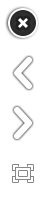
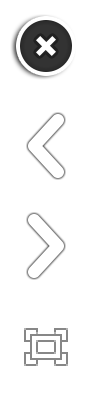
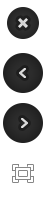
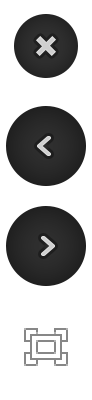
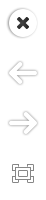
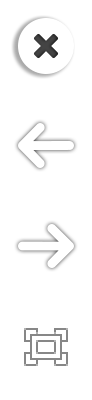
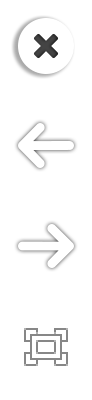
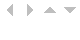

In [6]:
#print soup from the site
print(soup.prettify())

In [7]:
#pick specific html element for the bs output
news_title = soup.find("div",class_="content_title").text
news_paragraph = soup.find("div", class_="article_teaser_body").text
print(f"Title: {news_title}")
print(f"Summary: {news_paragraph}")

Title: NASA Finds Ancient Organic Material, Mysterious Methane on Mars
Summary: NASA’s Curiosity rover has found evidence on Mars with implications for NASA’s search for life.


In [8]:
db = client.missionToMars_db
collection = db.news

In [9]:
results = soup.find_all('div', class_='content_title')
# Loop through returned results
for result in results:
    # Error handling
    try:
        title = result.find_all('div', class_='content_title').text
        summary = soup.find("div", class_="article_teaser_body").text
        link = result.a['href']

        # Run only if title, summary, and link are available
        if (title and price and link):
            # Print results
            print('-------------')
            print(title)
            print(summary)

            # Dictionary to be inserted as a MongoDB document
            post = {
                'title': title,
                'summary': summary,
            }

            collection.insert_one(post)

    except Exception as e:
        print(e)

ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?
ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?
ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?
ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?
ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?
ResultSet object has no attribute 'text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?
ResultSet object has no attribute 'text'. You're pro

In [10]:
print(result)

<div class="content_title">
<a href="/news/8325/nasa-is-ready-to-study-the-heart-of-mars/">
NASA is Ready to Study the Heart of Mars
</a>
</div>


Mars Featured images

In [11]:
#JPL site for featured space images 
url_image = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(url_image)

In [17]:
base_url = "{0.scheme}://{0.netloc}/".format(urlsplit(url_image))
print(base_url)

https://www.jpl.nasa.gov/


In [13]:
# #Design an xpath selector to grab the image
# xpath = "//*[@id=\"page\"]/section[3]/div/ul/li[1]/a/div/div[2]/img"

In [19]:
# #Use splinter to click on the mars featured image
# #to bring the full resolution image
#---
# results = browser.find_by_xpath(xpath)
# img = results[0]
# img.click()


In [20]:
#get image url using BeautifulSoup
html_image = browser.html
soup = bs(html_image, "html.parser")
img_url = soup.find("img", class_="thumb")["src"]
full_img_url = base_url + img_url
print(full_img_url)

https://www.jpl.nasa.gov//spaceimages/images/wallpaper/PIA22328-640x350.jpg


Mars Weather

In [21]:

#get mars weather's latest tweet from the website
url_weather = "https://twitter.com/marswxreport?lang=en"
browser.visit(url_weather)

In [22]:
html_weather = browser.html
soup = bs(html_weather, "html.parser")


In [23]:
mars_weather = soup.find("p", class_="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text").text
print(mars_weather)

This is what a solar eclipse looks like on Mars.  Phobos passing in front of the Sun on May 6, 2017, as observed by @MarsRovers Opportunitypic.twitter.com/JL0w4jcbQy


Mars Facts

In [24]:
url_facts = "http://space-facts.com/mars/"
browser.visit(url_facts)

In [25]:
html_facts = browser.html
soup = bs(html_facts, "html.parser")

In [26]:
print(soup.prettify())

<!DOCTYPE html>
<html class="has-cookie-bar cookie-bar-bottom-bar cookie-bar-bar" lang="en-US" prefix="og: http://ogp.me/ns#" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="153d19f04460b5eb7b1ed2d38890ad1e" name="maValidation"/>
  <meta charset="utf-8"/>
  <link href="https://space-facts.com/feed/" rel="alternate" title="Space Facts RSS Feed" type="application/rss+xml"/>
  <title>
   Mars Facts - Interesting Facts about Planet Mars
  </title>
  <meta content="Scientific, historic and cultural facts about Mars, the &quot;Red Planet&quot;. Learn about Mars' features, characteristics and missions!" name="description"/>
  <link href="https://space-facts.com/mars/" rel="canonical"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="article" property="og:type"/>
  <meta content="Mars Facts - Interesting Facts about Planet Mars" property="og:title"/>
  <meta content="Scientific, historic and cultural facts about Mars, the &quot;Red Planet&quot;. Learn about Mars'

In [27]:
mars_facts = soup.find("div",class_="attachment_1086")
mars_facts


In [28]:
table = pd.read_html(url_facts)
table[0]
df_mars_facts = table[0]
df_mars_facts


,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.42 x 10^23 kg (10.7% Earth)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.52 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-153 to 20 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [29]:
df_mars_facts.columns = ["Criteria","Unit"]
df_mars_facts.set_index(["Criteria"])

,Unit
Criteria,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.42 x 10^23 kg (10.7% Earth)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.52 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-153 to 20 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


Mars Hemisperes

In [89]:
url_hemisperes = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit = url_hemisperes
html_hemisperes = browser.html
soup = bs(html_hemisperes,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html data-scribe-reduced-action-queue="true" lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")&gt;-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"00f4271700bd528b.725d633d95b14a71\u003c:00385b3500dcf622","server_request_start_time":1527666203083,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_a\/1.0.1\/20180504.1941.bd0c413","ttft_browser":"chrome"};!function(){fu